In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle as pkl

sns.set_style('dark')

Loading Dataset

In [2]:
dataset = pd.read_csv("./data/winequalityN.csv")

In [7]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
dataset.shape

(6497, 13)

In [5]:
dataset.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [14]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [15]:
columns = dataset.columns

In [16]:
dataset.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

<Axes: >

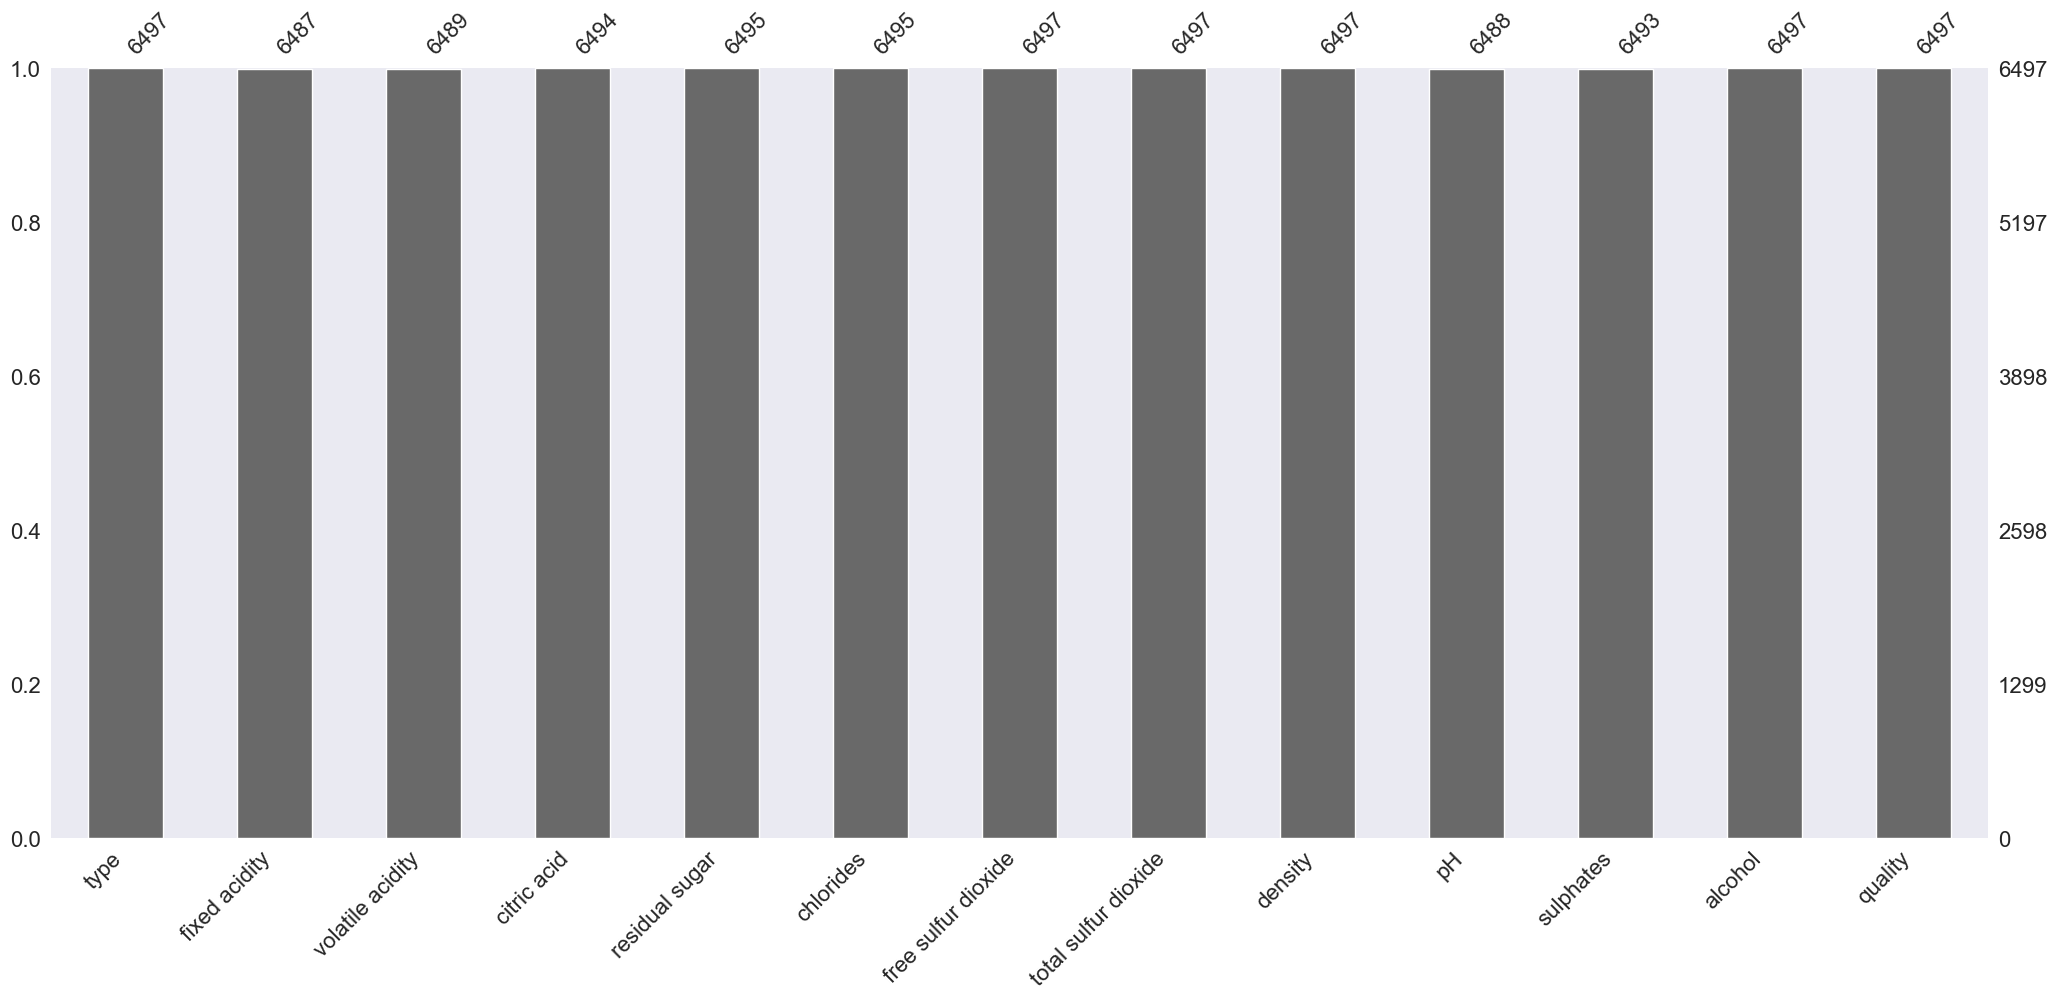

In [17]:
msno.bar(dataset)

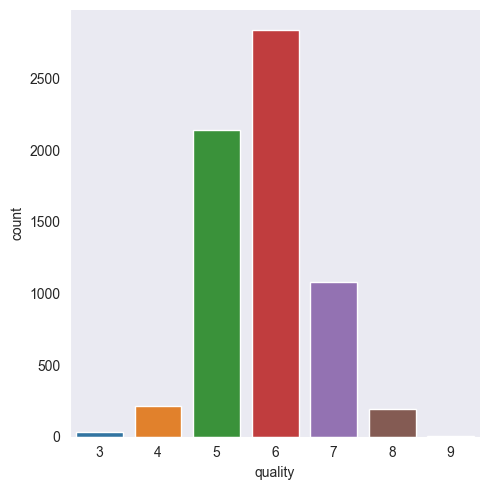

In [18]:
sns.catplot(x="quality", data=dataset, kind="count")

Changing Quality Values between 3-9 to only 3 Quality Classes 0-1-2

In [19]:
dataset.quality = dataset.quality.replace({3: 0, 4: 0, 5: 0, 6: 1, 7: 2, 8: 2, 9: 2})

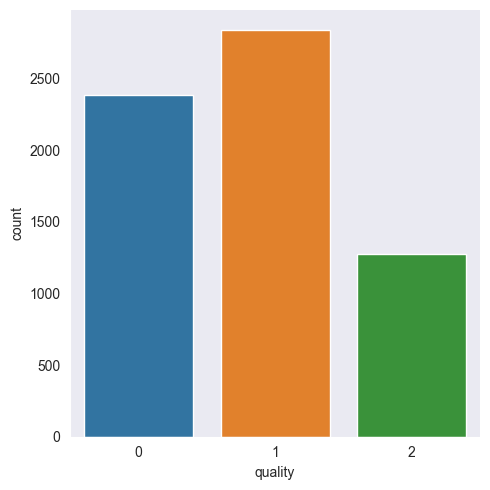

In [20]:
sns.catplot(x="quality", data=dataset, kind="count")

In [21]:
dataset[["quality"]].value_counts()

quality
1          2836
0          2384
2          1277
dtype: int64

Dropping NA Values in the Dataset

In [22]:
dataset = dataset.dropna()

Transforming String Values to Numeric Values

In [23]:
dataset.type = dataset.type.replace({"white": 1, "red" : 0})


C:\Users\mende\AppData\Local\Temp\ipykernel_17340\1351532392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.type = dataset.type.replace({"white": 1, "red" : 0})


Checking Each Quality Class Has the Same Number of Rows

In [24]:
df_0 = dataset[dataset['quality']==0]
df_1 = dataset[dataset['quality']==1]
df_2 = dataset[dataset['quality']==2]

df_0 = df_0.sample(1250)
df_1 = df_1.sample(1250)
df_2 = df_2.sample(1250)

dataset = pd.concat([df_0, df_1, df_2])

In [25]:
dataset[["quality"]].value_counts()

quality
0          1250
1          1250
2          1250
dtype: int64

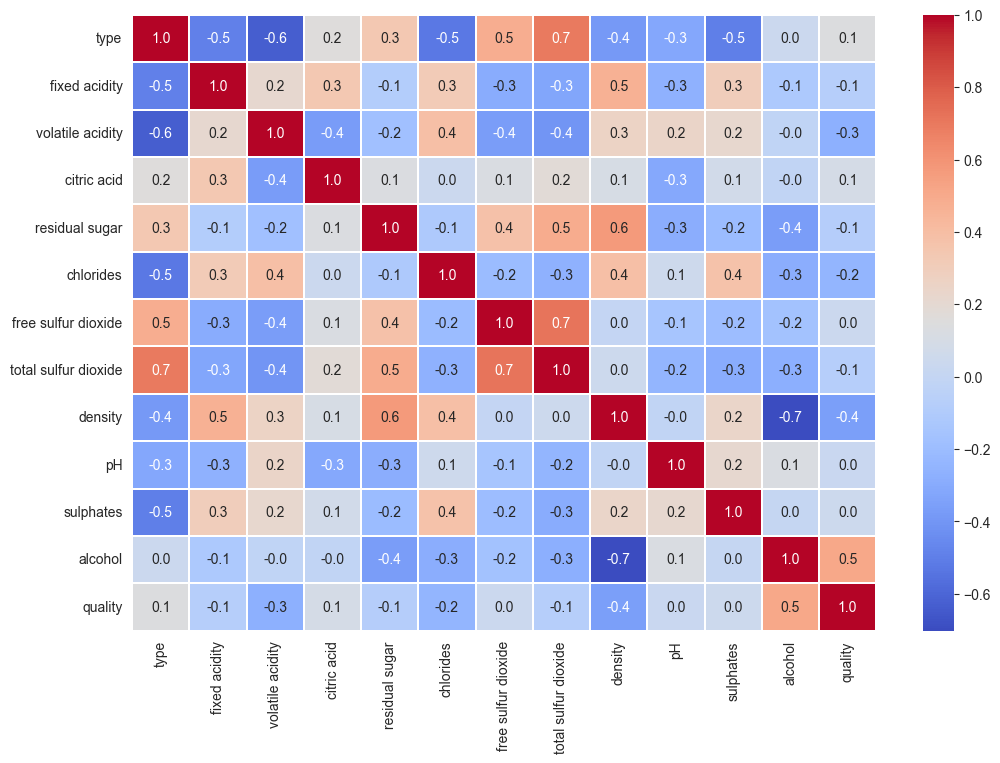

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [27]:
X = dataset.iloc[:, 0:-1]
y = dataset.iloc[:, -1]

Applying Standard Scaler

In [28]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

numerical_features = X.select_dtypes(include=['float64', 'int64'])

numerical_columns = numerical_features.columns

ct = ColumnTransformer([("only numeric", StandardScaler(), numerical_columns)], remainder='passthrough')


X_Train = ct.fit_transform(X_Train)
X_Test = ct.transform(X_Test)

Keras Nearest Neighboor Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_Train, Y_Train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_predicted = knn_model.predict(X_Test)

In [32]:
score = knn_model.score(X_Test, Y_Test)

print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.5813333333333334
accuracy_score percent : 58.13


In [33]:
print(sklearn.metrics.classification_report(Y_Test, y_predicted))

              precision    recall  f1-score   support

           0       0.58      0.67      0.62       250
           1       0.47      0.41      0.44       250
           2       0.68      0.67      0.67       250

    accuracy                           0.58       750
   macro avg       0.58      0.58      0.58       750
weighted avg       0.58      0.58      0.58       750



Naive Bayes Model

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_Train, Y_Train)

In [36]:
y_pred = nb_model.predict(X_Test)
print(sklearn.metrics.classification_report(Y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62       250
           1       0.32      0.14      0.19       250
           2       0.47      0.71      0.57       250

    accuracy                           0.50       750
   macro avg       0.46      0.50      0.46       750
weighted avg       0.46      0.50      0.46       750



SVC Model

In [37]:
from sklearn.svm import SVC

In [38]:
svm_model = SVC()
svm_model = svm_model.fit(X_Train, Y_Train)

In [39]:
y_pred = svm_model.predict(X_Test)
print(sklearn.metrics.classification_report(Y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       250
           1       0.46      0.38      0.42       250
           2       0.65      0.70      0.67       250

    accuracy                           0.62       750
   macro avg       0.61      0.62      0.61       750
weighted avg       0.61      0.62      0.61       750



Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
random_forest = RandomForestClassifier()

random_forest.fit(X_Train, Y_Train)

RandomForestClassifier()

In [42]:
y_pred = random_forest.predict(X_Test)
print(sklearn.metrics.classification_report(Y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       250
           1       0.57      0.50      0.53       250
           2       0.74      0.74      0.74       250

    accuracy                           0.68       750
   macro avg       0.68      0.68      0.68       750
weighted avg       0.68      0.68      0.68       750



Stochastic Gradient Descent Model

In [43]:
from sklearn.linear_model import SGDClassifier

In [44]:
sgd = SGDClassifier()
sgd.fit(X_Train, Y_Train)
pred_sgd = sgd.predict(X_Test)
print(sklearn.metrics.classification_report(Y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       250
           1       0.57      0.50      0.53       250
           2       0.74      0.74      0.74       250

    accuracy                           0.68       750
   macro avg       0.68      0.68      0.68       750
weighted avg       0.68      0.68      0.68       750



Exporting the Random Forest Model with Pickle

In [46]:
pkl.dump(random_forest, open("random_forest_model.pkl", "wb"))